# Feature Engineering


In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
df = pd.read_csv('../data/movie_classification.csv')

In [5]:
# change collumn names
column_name_mappings = {
    'Marketing expense': 'marketing_expense',
    'Production expense': 'production_expense',
    'Multiplex coverage': 'multiplex_coverage',
    'Budget': 'budget',
    'Movie_length': 'movie_length',
    'Lead_ Actor_Rating': 'lead_actor_rating',
    'Lead_Actress_rating': 'lead_actress_rating',
    'Director_rating': 'director_rating',
    'Producer_rating': 'producer_rating',
    'Critic_rating': 'critic_rating',
    'Trailer_views': 'trailer_views',
    '3D_available': '3d_available',
    'Time_taken': 'time_taken',
    'Twitter_hastags': 'twitter_hastags',
    'Genre': 'genre',
    'Avg_age_actors': 'Avg_age_actors',
    'Num_multiplex': 'num_multiplex',
    'Collection': 'collection'
}
df.rename(columns=column_name_mappings, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   marketing_expense    506 non-null    float64
 1   production_expense   506 non-null    float64
 2   multiplex_coverage   506 non-null    float64
 3   budget               506 non-null    float64
 4   movie_length         506 non-null    float64
 5   lead_actor_rating    506 non-null    float64
 6   lead_actress_rating  506 non-null    float64
 7   director_rating      506 non-null    float64
 8   producer_rating      506 non-null    float64
 9   critic_rating        506 non-null    float64
 10  trailer_views        506 non-null    int64  
 11  3d_available         506 non-null    object 
 12  time_taken           494 non-null    float64
 13  twitter_hastags      506 non-null    float64
 14  genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

## Splitting The Data
Splitting the data will prevent data leakage information between training and test data

In [6]:
def data_splitting(
    df: pd.DataFrame, 
    independent_variable: str,
    test_size: float = 0.2
):
    X = df.loc[:, df.columns!=independent_variable]
    y = df.loc[:, df.columns==independent_variable]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=test_size, 
        random_state=42,
    )
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test =  data_splitting(df.copy(), 'collection')

## 1. Imputation

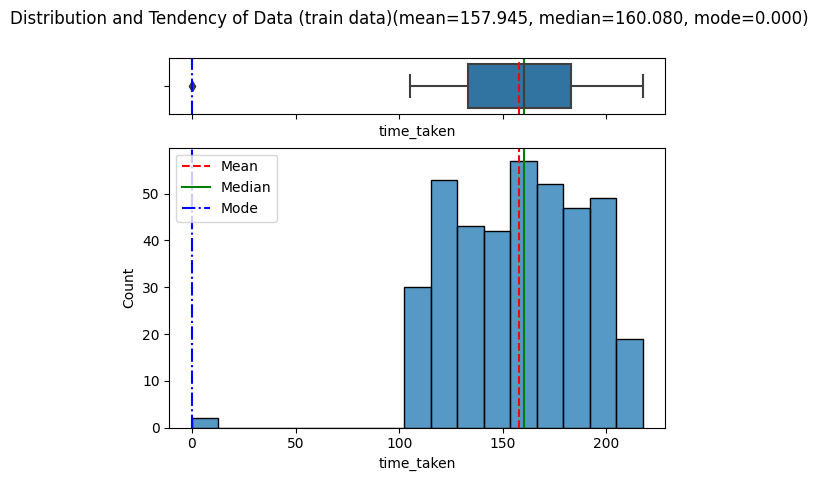

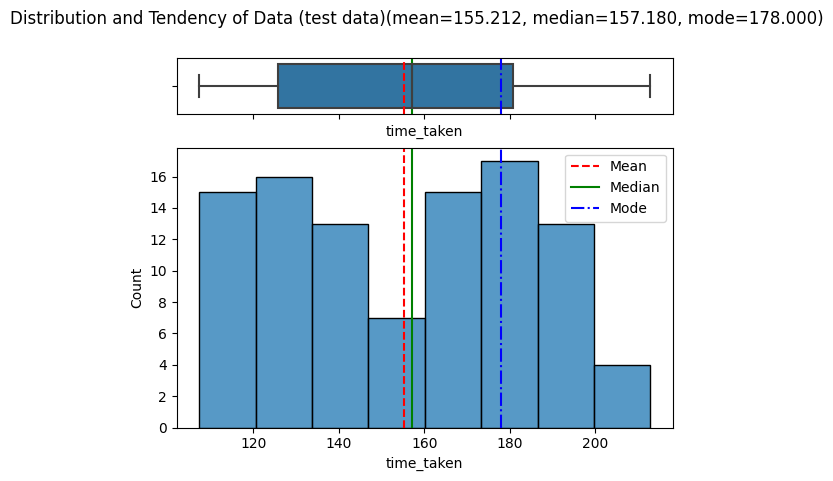

In [7]:
def plot_tendency(data: pd.DataFrame, feature: str, title: str) -> None:
    # calculate mean, median, mode
    mean = data[feature].mean()
    median = data[feature].median()
    mode = data[feature].mode().values[0]
    fig, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 1)})
    title += f'(mean={mean:.3f}, median={median:.3f}, mode={mode:.3f})'
    fig.suptitle(title)
    # box plot
    sns.boxplot(data=data, x=feature, ax=ax[0])
    ax[0].axvline(mean, color='r', linestyle='--')
    ax[0].axvline(median, color='g', linestyle='-')
    ax[0].axvline(mode, color='b', linestyle='-.')
    # histogram plot
    sns.histplot(data=data, x=feature, ax=ax[1])
    ax[1].axvline(mean, color='r', linestyle='--', label='Mean')
    ax[1].axvline(median, color='g', linestyle='-', label='Median')
    ax[1].axvline(mode, color='b', linestyle='-.', label='Mode')
    ax[1].legend()

    plt.show()

# check distribution of time_taken
plot_tendency(X_train, 'time_taken', title='Distribution and Tendency of Data (train data)')
plot_tendency(X_test, 'time_taken', title='Distribution and Tendency of Data (test data)')

It is impossible to have a time taken of a movie to be 0, change it to nan

In [9]:
# change 0 value to nan
X_train.loc[X_train['time_taken']==0, 'time_taken'] = np.nan 
X_test.loc[X_test['time_taken']==0, 'time_taken'] = np.nan 

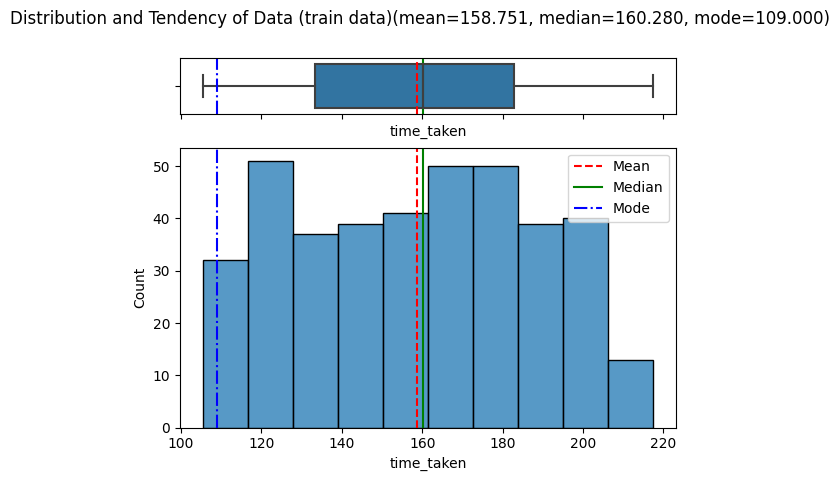

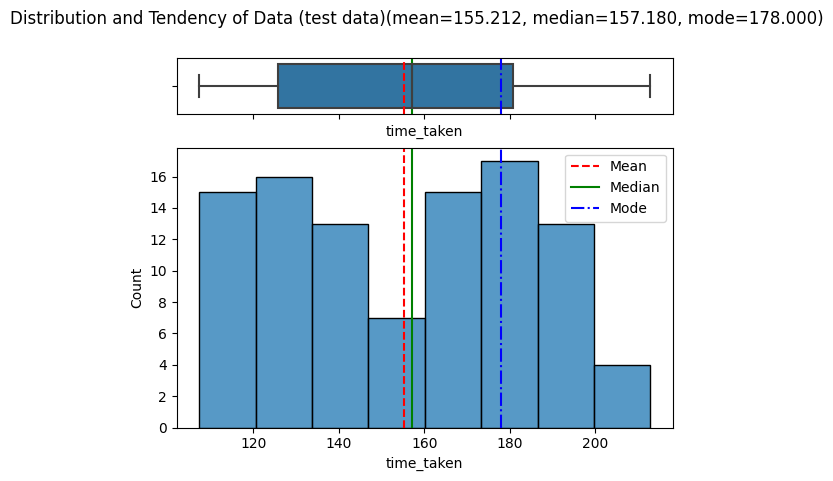

In [10]:
# check distribution of time_taken
plot_tendency(X_train, 'time_taken', title='Distribution and Tendency of Data (train data)')
plot_tendency(X_test, 'time_taken', title='Distribution and Tendency of Data (test data)')

The floating points being used produce uncanny results of the mode because of high granularity of each value. We can neglect the mode and just impute using mean or median.

In [11]:
# perform imputation on the missing `time_taken`` data
X_train['time_taken'].fillna(X_train['time_taken'].median(), inplace=True)
X_test['time_taken'].fillna(X_train['time_taken'].median(), inplace=True)

In [12]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

## 2. Handling Outliers

In [10]:
## for now just let it be, we will come back to it later

## 3. Categorical Encoding
all the categorical values aren't ordinal (doesn't represent order)

In [13]:
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True, dtype=int)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True, dtype=int)
display(X_train.head())
display(X_test.head())

,marketing_expense,production_expense,multiplex_coverage,budget,movie_length,lead_actor_rating,lead_actress_rating,director_rating,producer_rating,critic_rating,trailer_views,time_taken,twitter_hastags,Avg_age_actors,num_multiplex,Start_Tech_Oscar,3d_available_YES,genre_Comedy,genre_Drama,genre_Thriller
477,320.4680,91.20,0.3860,29463.720,170.8,8.860,9.005,8.795,9.135,6.96,340338,186.80,301.920,39,620,1,0,0,1,0
15,32.5478,71.28,0.4620,32407.870,130.0,7.700,7.825,7.640,7.840,6.80,497626,169.96,283.184,28,598,1,1,0,0,1
332,20.6932,67.12,0.5621,33502.205,96.8,6.525,6.710,6.600,6.885,8.62,480695,149.76,283.104,22,518,0,1,1,0,0
423,161.0084,91.20,0.3860,33902.165,158.6,8.960,9.100,8.830,9.065,7.96,340669,165.36,1622.400,29,634,1,0,0,1,0
19,34.5160,71.28,0.4620,31813.485,143.0,8.010,8.175,8.000,8.215,7.80,463328,171.28,242.912,27,578,0,0,0,0,0


,marketing_expense,production_expense,multiplex_coverage,budget,movie_length,lead_actor_rating,lead_actress_rating,director_rating,producer_rating,critic_rating,trailer_views,time_taken,twitter_hastags,Avg_age_actors,num_multiplex,Start_Tech_Oscar,3d_available_YES,genre_Comedy,genre_Drama,genre_Thriller
173,21.8356,63.10,0.490,35640.880,157.6,8.57,8.715,8.615,8.805,7.68,467457,197.44,203.776,59,540,0,1,1,0,0
274,21.1288,67.82,0.553,37540.690,106.4,7.90,8.010,7.810,8.120,8.48,510207,212.96,245.184,30,426,0,0,0,0,1
491,22.1148,110.48,0.391,33235.565,172.3,9.02,9.155,8.970,9.120,6.98,382738,141.44,282.176,47,563,0,0,1,0,0
72,21.8328,76.62,0.587,33691.075,81.3,7.27,7.520,7.195,7.440,7.16,500290,117.12,203.648,20,361,1,0,0,0,1
452,121.8034,91.20,0.287,34979.835,165.3,8.76,8.870,8.815,8.820,7.96,411619,134.44,302.576,21,646,0,0,1,0,0


## 4. Save Data

In [14]:
def create_folder(path: str):
    if not os.path.exists(path):
        os.mkdir(path)

create_folder("../data/train")
create_folder("../data/test")
X_train.to_csv("../data/train/features.csv", index=False)
y_train.to_csv("../data/train/target.csv", index=False)
X_test.to_csv("../data/test/features.csv", index=False)
y_test.to_csv("../data/test/target.csv", index=False)